In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import plotly to plot PCA
#import matplotlib to plot histograms
import matplotlib.pyplot as plt
#import statsmodel for Kolmogorov-Smirnov test to determine if the samples came from the same distribution
from scipy.stats import ks_2samp, kurtosis, skew

In [13]:
#import thinsection data from excel 
dFthinSectionData = pd.read_excel(r'C:\Users\therobe7\OneDrive\SRC_and_Research\MountJoy\TestCorrect Timpoweap Data sheet.xlsx',\
                                  sheet_name = 'AllData');
dFthinSectionData.set_index('Sample', inplace=True);
print(dFthinSectionData)

           Irregular fenestra  Horizontal sheetcrack  \
Sample                                                 
Timp B8                    55                      5   
Timp B9                     5                      0   
Timp B7                    60                     12   
Timp L2                    55                     12   
Timp O1                    38                      5   
...                       ...                    ...   
Timp R3                    10                      0   
Timp TC1                    0                      0   
Timp TC-2                   5                      0   
Timp TC4                    5                      0   
Timp Z5                    74                     18   

           Interparticle pore space  Radial ooid  Tangential ooid  \
Sample                                                              
Timp B8                           0            0               22   
Timp B9                           0            0                

In [14]:
#Normalize the data
scalerData = StandardScaler(dFthinSectionData)
#scalerData = StandardScaler(dFthinSectionData.loc('Irregular fenestra':'Seafloor micrite'))

C:\Users\therobe7\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass copy=           Irregular fenestra  Horizontal sheetcrack  \
Sample                                                 
Timp B8                    55                      5   
Timp B9                     5                      0   
Timp B7                    60                     12   
Timp L2                    55                     12   
Timp O1                    38                      5   
...                       ...                    ...   
Timp R3                    10                      0   
Timp TC1                    0                      0   
Timp TC-2                   5                      0   
Timp TC4                    5                      0   
Timp Z5                    74                     18   

           Interparticle pore space  Radial ooid  Tangential ooid  \
Sample                                                              
Timp B8                       

4


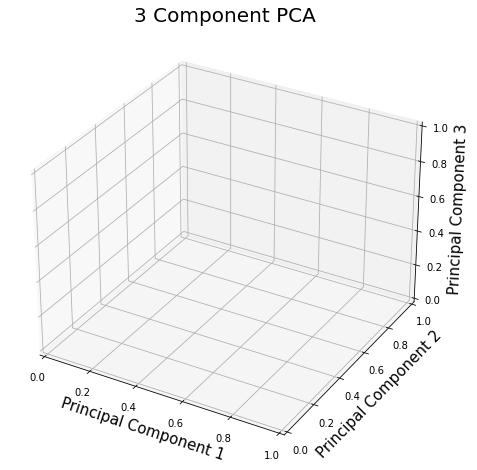

In [18]:
#Perform PCA
pca = PCA(.70)
pca.fit(dFthinSectionData);
pThinSectionData = pca.transform(dFthinSectionData);
print(pca.n_components_)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)
#tPCA = pca.components_
plt.show()

In [17]:
## TODO 
#ax.scatter(pThinSectionData[0:8,0],pThinSectionData[0:8,1],pThinSectionData[0:8,2], c="blue", marker="o") # plot the point (2,3,4) on the figure
#ax.scatter(pThinSectionData[9:28:,0],pThinSectionData[9:28,1],pThinSectionData[9:28,2],c="red", marker="x")
#plt.show()

# Statistical Shtuff

In [6]:
#calculate and print the mean
dMean1 = np.mean(pThinSectionData[:,2]);
print(dMean1);
#calculate and print the median
dMedian1 = np.median(pThinSectionData[:,2]);
print(dMedian)
#calculate and print the standard deviation
dStdDev1 = np.std(pThinSectionData[:,2]);
print(dStdDev1)
#calculate and print the variance
dVar1 = np.var(pThinSectionData[:,2]);
print(dVar1)
#calculate and print the skewness
dSkew1 = skew(pThinSectionData[:,2]);
print(dSkew1)
#calculate and print the kurtosis
dKurt1 = kurtosis(pThinSectionData[:,2]);
print(dKurt1)
#perform a Kolmogorov-Smirnov test
dBioKsTestResult = ks_2samp(dFthinSectionData.loc['N-03':'N-13', "Biotite"], dFthinSectionData.loc['RR-01':'K-09', "Biotite"])
dPCA2KsTestResult = ks_2samp(pThinSectionData[0:8,2], pThinSectionData[9:28,2])
#create a histogram for biotite percentage
fig, axs = plt.subplots(1, 1, figsize =(10,7), tight_layout = True)
axs.hist(dFthinSectionData.loc[:, "Biotite"])
plt.xlabel("Percentage")
plt.ylabel("Number of Samples")
plt.title("Biotite Percentage")
#show plot
plt.show()
fig, axs = plt.subplots(1, 1, figsize =(10,7), tight_layout = True)
axs.hist(dFthinSectionData.loc['N-03':'N-13',"Biotite"])
plt.xlabel("Percentage")
plt.ylabel("Number of Samples")
plt.title("Ninuluk Biotite Percentage")

NameError: name 'np' is not defined